In this project we will create a Convolutional Neural Network which will be able to predict whether a plant is suffering from a disease. We will use different layers and other hyperparameters for building, training and testing this classifictaion model.We will be using tensorflow and keras for this project.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
from sklearn.preprocessing import label_binarize,  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical 

Next we will import all the required libraries. As we are making a CNN model we will import all the required layers, activations, optimizers, etc.  

C:\Users\dell\AppData\Local\Temp\ipykernel_15604\3261569370.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


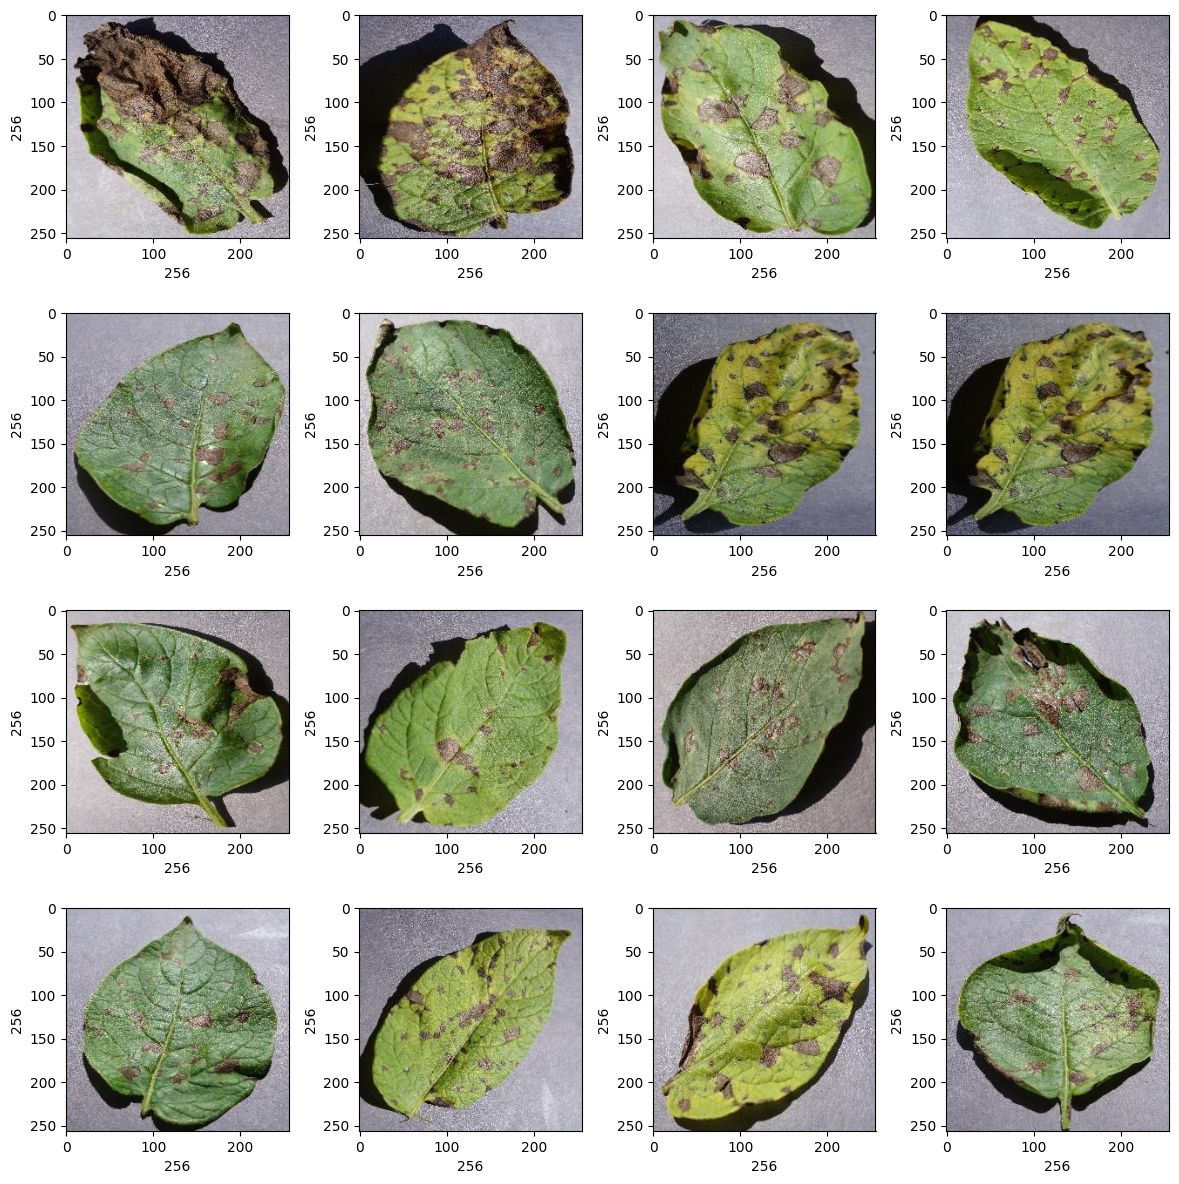

In [7]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "Data/plant_images/Potato___Early_blight"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

Now we will observe some of the iamges that are their in our dataset. We will plot 12 images here using the matplotlib library.

In [35]:
import cv2

def convert_image_to_array(image_dir):
    try:
        # Load image in color (Default is BGR in OpenCV)
        image = cv2.imread(image_dir)
        
        if image is not None:
            # Resize to 256x256 (matches your current shape)
            image = cv2.resize(image, (256, 256))
            
            # OPTIONAL: Convert BGR to RGB (OpenCV loads as Blue-Green-Red by default)
            # This is better for visualization, though the model learns either way.
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            return image
        else:
            return np.array([])
            
    except Exception as e:
        print(f"Error : {e}")
        return None

After visualizing the images let us move forward and create a function which will convert the images into a numpy array. It is required because we will normalize our dataset after this.

In [36]:

dir = r"Data\plant_images"
root_dir = listdir(dir)
image_list = []
label_list = []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# Reading and converting image to numpy array
for directory in root_dir:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])
print(f"Images: {len(image_list)}")
print(f"Labels: {len(label_list)}")

Images: 900
Labels: 900


Now we will convert all the images into numpy array.

In [37]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0
0    300
1    300
2    300
Name: count, dtype: int64

We will also observe the number of images under different classes to see if the dataset is balanced or not

In [38]:
image_list[0].shape

(256, 256, 3)

Next we will observe the shape of the image.

In [39]:

print("Converting to NumPy arrays...")
np_image_list = np.array(image_list, dtype=np.float16) / 255.0  
np_label_list = np.array(label_list)

print(f"Image Array Shape: {np_image_list.shape}")

Converting to NumPy arrays...
Image Array Shape: (900, 256, 256, 3)


Checking the total number of the images which is the length of the labels list.

In [40]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

Next we will use sklearn train_test_split to split the dataset into testing and training data. Here I have taken test size as 0.2 so my data will be divided into 80% training and 20% testing data.

In [41]:
print("Splitting data...")

# First split: Train vs Test/Validation
x_train, x_val, y_train, y_val = train_test_split(
    np_image_list, 
    np_label_list, 
    test_size=0.2, 
    random_state=42 # Ensures you get the same random mix every time
)

print(f"Training Data: {x_train.shape}")
print(f"Validation Data: {x_val.shape}")

Splitting data...
Training Data: (720, 256, 256, 3)
Validation Data: (180, 256, 256, 3)


Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

In [42]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [43]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

c:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

Next we will create a network architecture for the model. We have used different types of layers according to their features namely Conv_2d (It is used to create a convolutional kernel that is convolved with the input layer to produce the output tensor), max_pooling2d (It is a downsampling technique which takes out the maximum value over the window defined by poolsize), flatten (It flattens the input and creates a 1D output), Dense (Dense layer produce the output as the dot product of input and kernel).


In [44]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

While compiling the model we need to set the type of loss which will be Binary Crossentropy for our model alongwith this we also need to set the optimizer and the metrics respectively.

In [45]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

Next we will split the dataset into validation and training data.

In [46]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 940ms/step - accuracy: 0.4948 - loss: 1.0778 - val_accuracy: 0.7083 - val_loss: 0.9852
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 816ms/step - accuracy: 0.6354 - loss: 0.9713 - val_accuracy: 0.7083 - val_loss: 0.8645
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 833ms/step - accuracy: 0.6493 - loss: 0.8686 - val_accuracy: 0.7361 - val_loss: 0.7583
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 822ms/step - accuracy: 0.6875 - loss: 0.7675 - val_accuracy: 0.7917 - val_loss: 0.6770
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 810ms/step - accuracy: 0.8090 - loss: 0.6757 - val_accuracy: 0.8056 - val_loss: 0.5904
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 821ms/step - accuracy: 0.8507 - loss: 0.5913 - val_accuracy: 0.8889 - val_loss: 0.5254
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 814ms/step - accuracy: 0.9253 - loss: 0.5183 - val_accuracy: 0.9097 - val_loss: 0.4704
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 811ms/step - accuracy: 0.9462 - loss: 0.4543 - val_accuracy: 0.9236 - val_loss:

Fitting the model with the data and finding out the accuracy at each epoch to see how our model is learning. Now we will train our model on 10 epochs and a batch size of 128. You can try using more number of epochs to increase accuracy but here we can see that the model has already raeched a very high accuracy so we don't need to run it for more. During each epochs we can see how the model is performing by viewing the training and validation accuracy.

In [48]:

model.save(r"D:\project_learning\DeepLearning\Plant_disease_pridiction\Collab Code\plant_disease.keras") 

json_model = model.to_json()
with open(r'D:\project_learning\DeepLearning\Plant_disease_pridiction\Collab Code\plant_disease.json', 'w') as json_file:
    json_file.write(json_model)

model.save_weights(r'D:\project_learning\DeepLearning\Plant_disease_pridiction\Collab Code\plant_disease.weights.h5')

print("All files saved successfully.")

All files saved successfully.


Saving the model using different techniques.

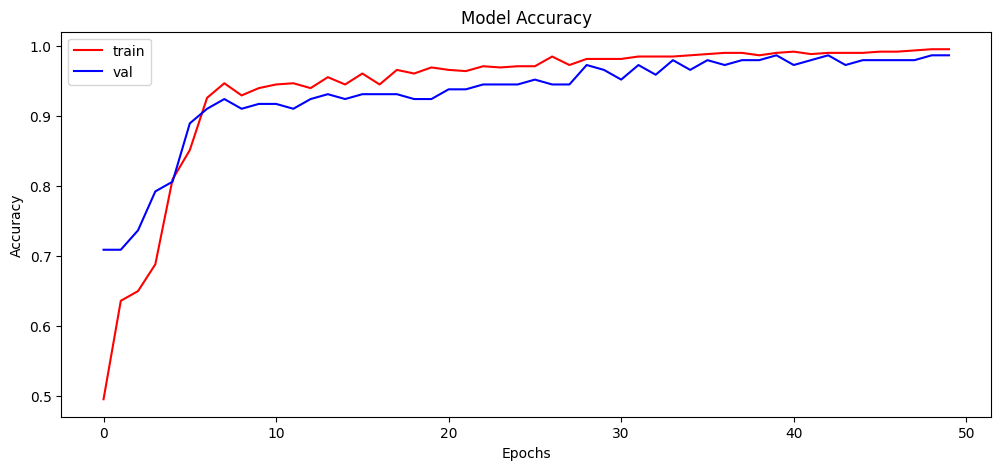

In [49]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

Next we will plot the accuracy of the model for the trainig history.

In [51]:
# 1. Convert lists to NumPy arrays
# We assume x_test and y_test are the variables you want to check
x_test = np.array(x_test)
y_test = np.array(y_test)

# 2. Check the shape (It must look like (180, 256, 256, 3))
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# 3. Now run the evaluation again
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100:.2f}%")

x_test shape: (180, 256, 256, 3)
y_test shape: (180, 3)
[INFO] Calculating model accuracy
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9444 - loss: 13.0925
Test Accuracy: 94.44%


Evaluating the model to know the accuracy of the model.


In [52]:
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


Next we will use our model to predict predicting the testing dataset label.

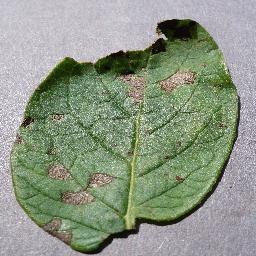

In [53]:
# Plotting image to compare
img = array_to_img(x_test[10])
img

In [54]:
# Finding max value from predition list and comaparing original value vs predicted
print("Originally : ",all_labels[np.argmax(y_test[10])])
print("Predicted : ",all_labels[np.argmax(y_pred[10])])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight


Printing out the original and the predicted label.

## Conclusion

We started with loading the dataset and visualizing the images. Normalizing is an important step when working with any type of dataset. After that we created a CNN Model which is further used for predicting the plant diseases using the image supplied to model.
This model is highly beneficial as it can be used by different agricultural firms and farmers to increase their yield and stop wastage of crops due to disease.